<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Monte Carlo Simulation in Python 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Monte Carlo Simulation

Here's two dashboards to demonstration of Monte Carlo simulation for subsurface uncertainty modeling workflows. This should help you get started with:

* building data science workflows integrate uncertainty sources, i.e, math with distributions
* using more advanced data science workflows like bootstrap and Markov chain Monte Carlo (McMC)

I have recorded a walk-through of this interactive dashboard in my [Data Science Interactive Python Demonstrations](https://www.youtube.com/playlist?list=PLG19vXLQHvSDy26fM3hDLg3VCU7U5BGZl) series on my [YouTube](https://www.youtube.com/@GeostatsGuyLectures) channel.

* Join me for walk-through of this dashboard [09 Data Science Interactive: Monte Carlo Simulation](TBD). I'm stoked to guide you and share observations and things to try out!   

* I have a lecture on [Monte Carlo Simulation](https://www.youtube.com/watch?v=Qb8TsSINpnU&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=13&t=3s) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) course. Note, for all my recorded lecture the interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

* Also, I have a lecture on [Markov chain Monte Carlo](https://www.youtube.com/watch?v=7QX-yVboLhk&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=34) as part of Bayesian regression in my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course.

#### Monte Carlo Simulation

Definition: random sampling from a distribution.

Procedure: 

1. Model the representative distribution (CDF), $F_X(x)$
2. Draw a random value from a uniform [0,1] distribution (p-value), $p^\ell$
3. Apply the inverse of the CDF to calculate the associated realization, $F^{-1}_X(p^\ell)$

In practice, Monte Carlo Simulation (MCS) refers to the workflow with multiple realizations drawn to buld an uncertainty model. 

\begin{equation}
x^\ell = F^{-1}_X(p^\ell),  \, \forall \, \ell = 1,\ldots, L
\end{equation}

where $x^\ell$ is the realization of the variable $X$ drawn from its CDF, $F_X(x)$, with cumulative probability, p-value, $p^\ell$.  

#### Monte Carlo Simulation for Uncertainty Modeling

It would be trivial to apply MCS to a single random variable, after many realizations one would get back the original distribution. But this general method allows us to do math with distributions, random variables, to calculate uncertainty models! 

Definitions:

* **random variable** - a feature's value at a time or location is unknown and take on a range of possible values, $X_1$, usually defined by a PDF, $f_{X_1}(x_1)$, or CDF, $F_{X_1}(x_1)$ 

* **data value** - a sample observation at a specific location or time for a feature, $x_1\left(\bf{u}_{\alpha} \right)$ 

* **realization** - a random sample drawn from a random variable, $x_{\alpha}^{\ell}$ 

With MCS we can solve problems like this:

$Y = X_1 + X_2 + X_3$ given $X_1$, $X_2$, and $X_3$ are random variables with any distribution, parametric or empirical (a set of values known as a reference distribution).

#### Monte Carlo Simulation for Uncertainty Modeling General Workflow

The general approach is to:

1. Model all distributions for the input, variables of interest $F_{X_1},\ldots,F_{X_m}$.
2. For each realization draw $p^\ell_{1},\ldots,p^\ell_{m}$, p-values
3. Apply the inverse of each distribution to calculate a realization of each variable, $x^\ell_j = F_{X^\ell_j}^{-1}(p^\ell_j),  \, \forall \, j = 1,\ldots$, $m$ variables.
4. Apply each set of variables for a $\ell$ realization to the transfer function to calculate the ouptput realization, $y^\ell = F(x_1^\ell,\ldots,x_m^\ell)$.

Monte Carlo Simulation (MCS) is extremely powerful

* Possible to easily simulate uncertainty models for complicated systems 
* Simulations are conducted by drawing values at random from specified uncertainty distributions for each variable
* A single realization of each variable, $X_1^\ell, X_2^\ell,\ldots,X_m^\ell$ is applied to the transfer function to calculate the realization of the variable of interest (output, decision criteria):

\begin{equation}
Y^\ell = f(X_1^\ell,\ldots,X_m^\ell), \, \forall \, \ell = 1,\ldots, L
\end{equation}

* The MCS method builds empirical uncertainty models by random sampling

#### How many realizations, $L$?

The answer is enough realizations! 

* If the MCS computational cost is low then **many** is the right answer. 

* If too few realizations are calculated then the summary statistics and the entire CDF of the output, decision criteria may be incorrect. This is caused by fluctuations due to not enough samples (see the 'Law of Small Numbers'). 

#### The Simulation Perspective

There are many uncertainty operations that we can work out analytically, for which we don't need MCS:

* $X_1 + c$
* $c \cdot X_1$
* $X_1 + X_2$, given $X_1$ and $X_2$ are Gaussian distributed

But consider the following:

* $X_1 \times X_2$, given $X_1$ and $X_2$ could have any distribution
* what is the probability of winning the game of solitaire?

With MCS we simulate the system, sample $L$ outcomes and then summarize!

#### Limitations

The MCS method above assumes:
1. **representativity** - the distributions are representative
2. **independence** - the random variables are independent of eachother
3. **stationarity** - all realizations for each variable are from the same distribution, e.g., no change over time nor space 
  
#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 

That's all!

#### Load the Required Libraries

We will also need some standard Python packages. These should have been installed with Anaconda 3.

In [1]:
supress_warnings = True                                   # supress warnings?
import numpy as np                                        # ndarrys for gridded data
import matplotlib.pyplot as plt                           # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                   # summary statistics
import math                                               # math operators, e.g., square root and natural log
from ipywidgets import interactive                        # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
cmap = plt.cm.inferno                                     # default color bar, no bias and friendly for color vision defeciency
plt.rc('axes', axisbelow=True)                            # grid behind plotting elements
if supress_warnings == True:
    import warnings                                       # supress any warnings for this demonstration
    warnings.filterwarnings('ignore')                  

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

I just added a convenience function for adding major and minor gridlines.

In [125]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
    
def add_grid(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks
    
def sample_dist(mean,stdev,L,dist):
    pvalue = np.random.rand(L)
    if dist == 'log':
        mu = math.log(mean**2/(math.sqrt(stdev**2 + mean**2)))
        sigma = math.sqrt(math.log((stdev**2)/(mean**2)+1.0))
        z = stats.lognorm.ppf(pvalue,s = sigma, scale = math.exp(mu)) 
    elif dist == 'norm':
        z = stats.norm.ppf(pvalue,loc = mean, scale = stdev) 
    return pvalue,z

def make_dist(mean,stdev,dist):
    p = np.linspace(0.001,0.999,1000)
    if dist == 'log':
        mu = math.log(mean**2/(math.sqrt(stdev**2 + mean**2)))
        sigma = math.sqrt(math.log((stdev**2)/(mean**2)+1.0))
        z = stats.lognorm.ppf(p,s = sigma, scale = math.exp(mu))
    elif dist == 'norm':
        z = stats.norm.ppf(p,loc = mean, scale = stdev) 
    return p,z

def plot_input(mean,stdev,dist,xmin,xmax,L,title,xlabel,seed,ax):
    np.random.seed(seed=seed)
    pvalue, real = sample_dist(mean,stdev,L,dist)
    np.random.seed(seed=seed)
    cdf, val = make_dist(mean,stdev,dist)
    ax.plot(val,cdf,color='black',lw=2.0)
    
    for l in range(0,L):
        alpha = max(0.02,(6 - (L-l) )/5)
        dhead = 1;lhead = 0.02        
        if l == L-1:
            ax.plot([0.0,real[l]],[pvalue[l],pvalue[l]],color='red',alpha = alpha,lw=1,zorder=1)
            ax.plot([real[l],real[l]],[pvalue[l],lhead+0.02],color='red',alpha = alpha,lw=1,zorder=1)
            ax.annotate(format(int(real[l]), ','),xy=[real[l]+(xmax-xmin)*0.01,0.07],rotation=90.0,color='red',alpha = alpha)
            ax.scatter(real[l],0.01,s=30,color='red',edgecolor='black',alpha=1.0)
        else:
            ax.plot([0.0,real[l]],[pvalue[l],pvalue[l]],color='darkorange',alpha = alpha,lw=1,zorder=1)
            ax.plot([real[l],real[l]],[pvalue[l],lhead+0.02],color='darkorange',alpha = alpha,lw=1,zorder=1)
            ax.annotate(format(int(real[l]), ','),xy=[real[l]+(xmax-xmin)*0.01,0.07],rotation=90.0,color='darkorange',alpha = alpha)
            ax.scatter(real[l],0.01,s=10,color='yellow',edgecolor='black',alpha=1.0)

    ax.set_ylim([0,1]) 
    ax.set_xlim([xmin,xmax])
    if dist == 'log':
        ax.set_xscale('log')
        ax.grid(which='both',axis='both',visible=True)
        ax.grid(True, which='major',linewidth = 1.0); ax.grid(True, which='minor',linewidth = 0.2)
    elif dist == 'norm':
        ax.set_xscale('linear');
        add_grid(ax)        
    ax.set_xlabel(xlabel); ax.set_ylabel('Cumulative Probability'); ax.set_title(title)
    return real

#### Simple Monte Carlo Simulation Demonstration

Now let's set up our first dashboard.

In [3]:
l = widgets.Text(value='                                          Monte Carlo Simulation Demonstration, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

L = widgets.IntSlider(min=1, max = 40, value = 1, description = '$L$:',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
L.style.handle_color = 'gray'

dist1 = widgets.Dropdown(
    options=['Uniform','Triangular','Gaussian'],
    value='Gaussian',
    description='$X_1$:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
min1 = widgets.FloatSlider(min=0.0, max = 100.0, value = 10.0, description = 'Min',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
min1.style.handle_color = 'gray'
max1 = widgets.FloatSlider(min=0.0, max = 100.0, value = 90.0, description = 'Max',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
max1.style.handle_color = 'gray'

ui = widgets.HBox([L,dist1,min1,max1],kwargs = {'justify_content':'center'})
ui1 = widgets.VBox([l,ui],)

def make_sample_cdist(dist,zmin,zmax,L):
    cdf = np.linspace(0.001,0.999,1000)
    pvals = np.random.random(size = L)
    if dist == 'Triangular':  
        distribution = stats.triang(loc = zmin,c=0.5,scale = zmax-zmin)
    if dist == 'Uniform':        
        distribution = stats.uniform(loc = zmin,scale = zmax-zmin)
    if dist == 'Gaussian':
        mean = (zmax + zmin)*0.5; stdev = (zmax - zmin)/6.0
        distribution = stats.norm(loc = mean,scale = stdev)
    
    cdfx = distribution.ppf(cdf)
    sample = distribution.ppf(pvals)
    
    return sample, pvals, cdfx, cdf 
        
def f_make1(L,dist1,min1,max1): 
    np.random.seed(seed = 73073)
    sample, pvals, cdfx, cdf = make_sample_cdist(dist1,min1,max1,L)
    
    plt.subplot(121)
    plt.plot(cdfx,cdf,'--',color='black',linewidth = 3,zorder=10); add_grid()
    plt.xlim(0,100); plt.ylim(0,1.0); plt.xlabel("$X_1$"); plt.title("Cumulative Distribution Function, $X_1$"); plt.ylabel('Cumulative Probability')
     
    for l in range(0,L):
        alpha = max(0.02,(6 - (L-l) )/5)
        dhead = 1;lhead = 0.02        
        if l == L-1:
            plt.plot([0.0,sample[l]],[pvals[l],pvals[l]],color='red',alpha = alpha,lw=1,zorder=1)
            plt.plot([sample[l],sample[l]],[pvals[l],lhead+0.02],color='red',alpha = alpha,lw=1,zorder=1)
            head = plt.Polygon([[sample[l],0.02],[sample[l]-dhead,lhead+0.02],[sample[l]+dhead,lhead+0.02],[sample[l],0.02]], color='red',alpha = alpha,zorder=1)
            plt.annotate(int(sample[l]),[sample[l]+1,0.07],rotation=90.0,color='red',alpha = alpha)
            plt.scatter(sample[l],0.01,s=30,color='red',edgecolor='black',alpha=1.0)
            plt.gca().add_patch(head)
        else:
            plt.plot([0.0,sample[l]],[pvals[l],pvals[l]],color='darkorange',alpha = alpha,lw=1,zorder=1)
            plt.plot([sample[l],sample[l]],[pvals[l],lhead+0.02],color='darkorange',alpha = alpha,lw=1,zorder=1)
            head = plt.Polygon([[sample[l],0.02],[sample[l]-dhead,lhead+0.02],[sample[l]+dhead,lhead+0.02],[sample[l],0.02]], color='darkorange',alpha = alpha,zorder=1)
            plt.annotate(int(sample[l]),[sample[l]+1,0.07],rotation=90.0,color='darkorange',alpha = alpha)
            plt.scatter(sample[l],0.01,s=10,color='yellow',edgecolor='black',alpha=1.0)
            plt.gca().add_patch(head)            

    plt.subplot(122)
    plt.hist(sample,density= False,bins=np.linspace(0,100,20),weights=None,color='red',alpha=1.0,edgecolor='black',zorder=1)
    if l > 0:
        plt.hist(sample[:-1],density= False,bins=np.linspace(0,100,20),weights=None,color='darkorange',alpha=0.8,edgecolor='black',zorder=5)
    
    for l in range(0,L):
        if l == L-1:
            plt.scatter(sample[l],0.1,s=30,color='red',edgecolor='black',alpha=1.0,zorder=l+10)
        else:
            plt.scatter(sample[l],0.1,s=10,color='yellow',edgecolor='black',alpha=1.0,zorder=l+10)
    
    plt.xlabel(r"$x_{\alpha}, \alpha = 1,\ldots,L$"); plt.title(r"Monte Carlo Simulation Realizations, $x_{\alpha}, \alpha = 1,\ldots,L$"); plt.ylabel('Frequency')
    plt.xlim([0,100]); plt.ylim([0,10]); add_grid()
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.2)
    plt.show()    

interactive_plot1 = widgets.interactive_output(f_make1, {'L':L,'dist1':dist1,'min1':min1,'max1':max1})
interactive_plot1.clear_output(wait = True)                # reduce flickering by delaying plot updating  

In [4]:
display(ui1, interactive_plot1)                            # display the interactive plot

Output()

#### Monte Carlo Simulation Demonstration

Now let's set up our second dashboard for adding or multiplying distributions.

In [5]:
# interactive calculation of the random sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                                          Monte Carlo Simulation Demonstration, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

operator = widgets.RadioButtons(options=['Add','Mult'],description='Operator:',disabled=False,layout=Layout(width='230px', height='100px'))

L = widgets.IntSlider(min=1, max = 10000, value = 1, description = '$L$:',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
L.style.handle_color = 'gray'

uiL = widgets.VBox([L,operator])

dist1 = widgets.Dropdown(
    options=['Uniform','Triangular','Gaussian'],
    value='Gaussian',
    description='$X_1$:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
min1 = widgets.FloatSlider(min=0.0, max = 100.0, value = 10.0, description = 'Min',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
min1.style.handle_color = 'blue'
max1 = widgets.FloatSlider(min=0.0, max = 100.0, value = 30.0, description = 'Max',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
max1.style.handle_color = 'blue'
ui1 = widgets.VBox([dist1,min1,max1],kwargs = {'justify_content':'center'}) 

dist2 = widgets.Dropdown(
    options=['Triangular', 'Uniform', 'Gaussian'],
    value='Gaussian',
    description='$X_2$:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
min2 = widgets.FloatSlider(min=0.0, max = 100.0, value = 10.0, description = 'Min',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
min2.style.handle_color = 'red'
max2 = widgets.FloatSlider(min=0.0, max = 100.0, value = 30.0, description = 'Max',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
max2.style.handle_color = 'red'
ui2 = widgets.VBox([dist2,min2,max2],kwargs = {'justify_content':'center'})

dist3 = widgets.Dropdown(
    options=['Triangular', 'Uniform', 'Gaussian'],
    value='Gaussian',
    description='$X_3$:',
    disabled=False,
    layout=Layout(width='200px', height='30px')
)
min3 = widgets.FloatSlider(min=0.0, max = 100.0, value = 10.0, description = 'Min',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
min3.style.handle_color = 'yellow'
max3 = widgets.FloatSlider(min=0.0, max = 100.0, value = 30.0, description = 'Max',orientation='horizontal',layout=Layout(width='230px', height='50px'),continuous_update=False)
max3.style.handle_color = 'yellow'
ui3 = widgets.VBox([dist3,min3,max3],kwargs = {'justify_content':'center'})

ui = widgets.HBox([uiL,ui1,ui2,ui3])
ui2 = widgets.VBox([l,ui],)

def make_dist(dist,zmin,zmax,L):
    
    if dist == 'Triangular':
        z = np.random.triangular(left=zmin, mode=(zmax+zmin)*0.5, right=zmax, size=L)
        pdf = stats.triang.pdf(np.linspace(0.0,100.0,1000), loc = zmin, c = 0.5, scale = zmax-zmin)* 2 * L 
    if dist == 'Uniform':
        z = np.random.uniform(low=zmin, high=zmax, size=L)
        pdf = stats.uniform.pdf(np.linspace(0.0,100.0,1000), loc = zmin, scale = zmax-zmin) * 2 * L
    if dist == 'Gaussian':
        mean = (zmax + zmin)*0.5; sd = (zmax - zmin)/6.0
        z = np.random.normal(loc = mean, scale = sd, size=L)
        pdf = stats.norm.pdf(np.linspace(0.0,100.0,1000), loc = mean, scale = sd) * 2 * L
    return z, pdf
        
def f_make(L,operator,dist1,min1,max1,dist2,min2,max2,dist3,min3,max3): 
    np.random.seed(seed = 73073)
    x1, pdf1 = make_dist(dist1,min1,max1,L)
    x2, pdf2 = make_dist(dist2,min2,max2,L)
    x3, pdf3 = make_dist(dist3,min3,max3,L)

    xvals = np.linspace(0.0,100.0,1000)
    plt.subplot(241)
    plt.hist(x1,density = False,bins=np.linspace(0,100,50),weights=None,color='blue',alpha=0.7,edgecolor='grey')
    plt.plot(xvals,pdf1,'--',color='black',linewidth = 3)
    plt.xlim(0,100); plt.xlabel("$X_1$"); plt.title("First Predictor Feature, $X_1$"); plt.ylabel('Frequency')
 
    plt.subplot(242)
    plt.hist(x2,density = False,bins=np.linspace(0,100,50),weights=None,color='red',alpha=0.7,edgecolor='grey')
    plt.plot(xvals,pdf2,'--',color='black',linewidth = 3)
    plt.xlim(0,100); plt.xlabel("$X_1$"); plt.title("Second Predictor Feature, $X_2$"); plt.ylabel('Frequency')
 
    plt.subplot(243)
    plt.hist(x3,density = False,bins=np.linspace(0,100,50),weights=None,color='yellow',alpha=0.7,edgecolor='grey')
    plt.plot(xvals,pdf3,'--',color='black',linewidth = 3)
    plt.xlim(0,100); plt.xlabel("$X_1$"); plt.title("Third Predictor Feature, $X_3$"); plt.ylabel('Frequency')
 
    y = np.zeros(L)
    ymin = 0.0
    if operator == "Add":
        y = x1 + x2 + x3
    elif operator == "Mult":
        y = x1 * x2 * x3
        
    ymax = max(round((np.max(y)+50)/100)*100,100) # round up to nearest hundreds to avoid the chart jumping around
    
    plt.subplot(244)
    plt.hist(y,density = False,bins=np.linspace(ymin,ymax,50),weights=None,color='black',alpha=0.5,edgecolor='black')
    plt.xlabel("$Y$"); plt.ylabel('Frequency'); plt.xlim(ymin,ymax)
    if operator == "Add":
        plt.title("Response Feature, $y = X_1 + X_2 + X_3$")
    else:
        plt.title(r"Response Feature, $y = X_1 \times X_2 \times X_3$")
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.3, hspace=0.2)
    plt.show()    

interactive_plot = widgets.interactive_output(f_make, {'L':L,'operator':operator,'dist1':dist1,'min1':min1,'max1':max1,'dist2':dist2,'min2':min2,'max2':max2,'dist3':dist3,'min3':min3,'max3':max3})
interactive_plot.clear_output(wait = True)                # reduce flickering by delaying plot updating    

### Monte Carlo Simulation Demonstration

* specify the distributions for 3 Random Variables, $X_1$, $X_2$, and $X_3$ and select the operator $Y = f(X_1,X_2,X_3)$

* observe the distribution of the resulting Monte Carlos Simulation realization histograms of $x_1^{\ell}$, $x_2^{\ell}$, $x_3^{\ell}$, and $y^{\ell}$

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

* **$L$**: number of realizations, **Operator**: addition for $Y = X_1 + X_2 + X_3$, multiplication for $Y = X_1 \times X_2 \times X_3$

* **$X_1$, $X_2$, and $X_3$**: distribution type, min and max. Assume mode or mean is centered and 3 st.dev. for Gaussian

In [6]:
display(ui2, interactive_plot)                            # display the interactive plot

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 640x480 with 4 Axes>', 'i…

#### Monte Carlo Simulation Lithium Salar Brine Resource Uncertainty Model Demonstration

Now let's buld an uncertainty model for a lithium salar brine resource. How much lithium is available for extraction?

* the lithium is disolved in the brine 
* the brine is in the pore space of a generally flat aquifer bounded by aquicludes below and above, and low permeability rock, pinch outs or fresh water transition around the periphery
* we need to calculate the mass of lithium available.

The predictor features include:

* **area** ($A$) - of the salar brine in units, $m^2$
* **average thickness** ($\overline{th}$) - the average thickness over the area of the salar brine of the bound aquifer
* **average effective porosity** ($\overline{\phi}_{e}$) - average effective porosity over the bound aquifer 
* **specific yield** ($s_y$) - the proportion of brine that is receoverable under gravity flow conditions
* **average lithium concentation** ($\overline{[Li]}$} - amount of disssolved lithium, in $\frac{mg}{L}$. E.g., average lithium concentations, Salton Sea 211 $\frac{mg}{L}$, Westmorland 48 $\frac{mg}{L}$, and Brawley 100 $\frac{mg}{L}$.

We will also use the following unit conversions:

* $\frac{1000 L}{m^3}$ - to convert from litres to meter cubed
* $\frac{tonne}{1.0^9 mg}$ - to convert from miligrams to metric tons, tonnes (1,000 kilograms)

Now we have the follow transfer function to calculate our lithium resource, with units shown:

\begin{equation}
m_{Li} \ (tonne) = A \ (m^2) \cdot \overline{th} \ (m) \cdot \overline{\phi}_{e} \ (\%) \cdot \frac{1}{100\%} \cdot 1,000 \left(\frac{L}{m^3}\right)  \cdot \overline{[Li]} \ \left(\frac{mg}{L}\right) \cdot \frac{1}{1.0^9} \left(\frac{tonne}{mg}\right) \cdot s_y \ (fraction)
\end{equation}

We can simplify this lithium resource transfer function to:

\begin{equation}
m_{Li} = A \cdot \overline{th} \cdot \overline{\phi}_{e} \cdot \overline{[Li]} \cdot s_y \cdot \frac{1}{1.0^8} \ (\text{tonnes of lithium resource})
\end{equation}

In [182]:
# interactive calculation of the random sample set (control of source parametric distribution and number of samples)
l = widgets.Text(value='                                          Monte Carlo Simulation Lithium Resources Demonstration, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))

L = widgets.IntSlider(min=1, max = 10000, value = 1, description = '$L$:',orientation='horizontal',
                      layout=Layout(width='230px', height='50px'),continuous_update=False)
L.style.handle_color = 'gray'

A_mean = widgets.IntSlider(min=1000, max = 10000000, value = 1000000, description = '$\mu_{A}$',
                             orientation='horizontal',layout=Layout(width='230px', height='50px'),
                             readout_format=',',continuous_update=False)
A_mean.style.handle_color = 'blue'

A_stdev = widgets.IntSlider(min=0, max = 10000000, value = 300000, description = '$\sigma_{A}$',
                            orientation='horizontal',layout=Layout(width='230px', height='50px'),
                            readout_format=',',continuous_update=False)
A_stdev.style.handle_color = 'blue'

ui_A = widgets.VBox([A_mean,A_stdev],kwargs = {'justify_content':'center'}) 

th_mean = widgets.IntSlider(min=1, max = 1000, value = 100, description = '$\mu_{\overline{th}}$',
                              orientation='horizontal',layout=Layout(width='230px', height='50px'),
                              readout_format=',',continuous_update=False)
th_mean.style.handle_color = 'darkblue'

th_stdev = widgets.IntSlider(min=0, max = 300, value = 60, description = '$\sigma_{\overline{th}}$',
                               orientation='horizontal',layout=Layout(width='230px', height='50px'),
                               readout_format=',',continuous_update=False)
th_stdev.style.handle_color = 'darkblue'

ui_th = widgets.VBox([th_mean,th_stdev],kwargs = {'justify_content':'center'}) 

li_mean = widgets.IntSlider(min=0, max = 400, value = 200, description = '$\mu_{\overline{Li}}$',
                               orientation='horizontal',layout=Layout(width='230px', height='50px'),
                               readout_format='.1%',continuous_update=False)
li_mean.style.handle_color = 'red'

li_stdev = widgets.IntSlider(min=0, max = 200, value = 50, description = '$\sigma_{\overline{Li}}$',
                                orientation='horizontal',layout=Layout(width='230px', height='50px'),
                                readout_format='.1%',continuous_update=False)
li_stdev.style.handle_color = 'red'

ui_li = widgets.VBox([li_mean,li_stdev],kwargs = {'justify_content':'center'}) 

ui_all = widgets.HBox([L,ui_A,ui_th,ui_li])
ui4 = widgets.VBox([l,ui_all],)


def f_make4(L,A_mean,A_stdev,th_mean,th_stdev,li_mean,li_stdev): 
    seed = 73073
    np.random.seed(seed = seed)
    
    phi_const = 0.2
    sy_const = 0.4       
    
    plt_x1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)
    plt_x2 = plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=1)
    plt_x3 = plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1) 
    plt_y = plt.subplot2grid((3, 3), (0, 1), rowspan=3, colspan=2) 
    
    np.random.seed(seed = 73073)
    
    A = plot_input(A_mean,A_stdev,'log',10000,10000000,L,r'Area ($A$)',r'Area ($m^2$)',seed,plt_x1)
    th = plot_input(th_mean,th_stdev,'log',1,1000,L,r'Average Thickness ($\overline{th}$)',r'Average Thickness ($m$)',seed,plt_x2)
    phi = np.full(L,phi_const)
    li = plot_input(li_mean,li_stdev,'norm',0.0,400.0,L,r'Average Lithium Grade ($\overline{[Li]}$)',r'Average Lithium Grade (mg/L)',seed,plt_x3)
    sy = np.full(L,sy_const)
    
    resource = (A * th * phi * li * sy) / 1.0e8
    last = resource[-1]    
    if L > 1:
        last_pvalue = resource.argsort().argsort()[-1]/(L-1) 
        plt_y.scatter(last,last_pvalue,color='red',edgecolor='black',s=30,zorder=1000)
        plt_y.plot([0,last],[last_pvalue,last_pvalue],color='red',zorder=200)
        plt_y.plot([last,last],[0.0,last_pvalue],color='red',zorder=200)
    else:
        plt_y.scatter(last,0.0,color='red',edgecolor='black',s=30,zorder=1000)
        plt_y.scatter(last,1.0,color='red',edgecolor='black',s=30,zorder=1000)
        
    plt_y.plot(np.sort(resource),np.linspace(0.0,1.0,L),color='black',lw=1,ls='--',zorder=200)
    plt_y.scatter(np.sort(resource),np.linspace(0.0,1.0,L),color='yellow',edgecolor='black',s=10,zorder=201)

    plt_y.set_ylim([0,1]); plt_y.set_xlim(1,1000); plt_y.set_ylabel('Cumulative Probability') 
    plt_y.set_xlabel('Lithium (tonnes)'); plt_y.set_title('Recoverable Lithium Resource')
    
    plt_y.plot([0,np.percentile(resource,10)],[0.1,0.1],color='black')
    plt_y.plot([np.percentile(resource,10),np.percentile(resource,10)],[0.0,0.1],color='black')
    
    plt_y.plot([0,np.percentile(resource,50)],[0.5,0.5],color='black')
    plt_y.plot([np.percentile(resource,50),np.percentile(resource,50)],[0.0,0.5],color='black')
    
    plt_y.plot([0,np.percentile(resource,90)],[0.9,0.9],color='black')
    plt_y.plot([np.percentile(resource,90),np.percentile(resource,90)],[0.0,0.9],color='black')
    plt_y.set_xscale('log')

    plt_y.annotate(r'$Li^{\ell}$ = ' + str(np.round(last,1)),xy=[last,0.015],color='red',rotation=270,zorder=200)
    plt_y.annotate('0.10',xy=[1.1,0.11]); plt_y.annotate('0.50',xy=[1.1,0.51]); plt_y.annotate('0.90',xy=[1.1,0.91])
    if L > 1:
        plt_y.annotate(r'$F_{\ell}^{-1}$ = P' + str(int(last_pvalue*100)),xy=[1.1,last_pvalue+0.01],color='red',rotation=0,zorder=200)
        plt_y.annotate(r'$P10_{Li}$ = ' + str(np.round(np.percentile(resource,10),1)),xy=[np.percentile(resource,10),0.015],rotation=270,zorder=100)
        plt_y.annotate(r'$P50_{Li}$ = ' + str(np.round(np.percentile(resource,50),1)),xy=[np.percentile(resource,50),0.015],rotation=270,zorder=100)
        plt_y.annotate(r'$P90_{Li}$ = ' + str(np.round(np.percentile(resource,90),1)),xy=[np.percentile(resource,90),0.015],rotation=270,zorder=100)
    else:
        plt_y.plot([last,last],[0.0,1.0],color='black',lw=1,ls='--',zorder=200)        
    
    plt_y.set_xscale('log')
    plt_y.grid(which='both',axis='both',visible=True)
    plt_y.grid(True, which='major',linewidth = 1.0); plt_y.grid(True, which='minor',linewidth = 0.2)
    
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.3, hspace=0.4); plt.show()
    
interactive_plot4 = widgets.interactive_output(f_make4, {'L':L,'A_mean':A_mean,'A_stdev':A_stdev,'th_mean':th_mean,'th_stdev':th_stdev,'li_mean':li_mean,'li_stdev':li_stdev})
interactive_plot4.clear_output(wait = True)                # reduce flickering by delaying plot updating    

In [183]:
display(ui4, interactive_plot4)                            # display the interactive plot

Output()

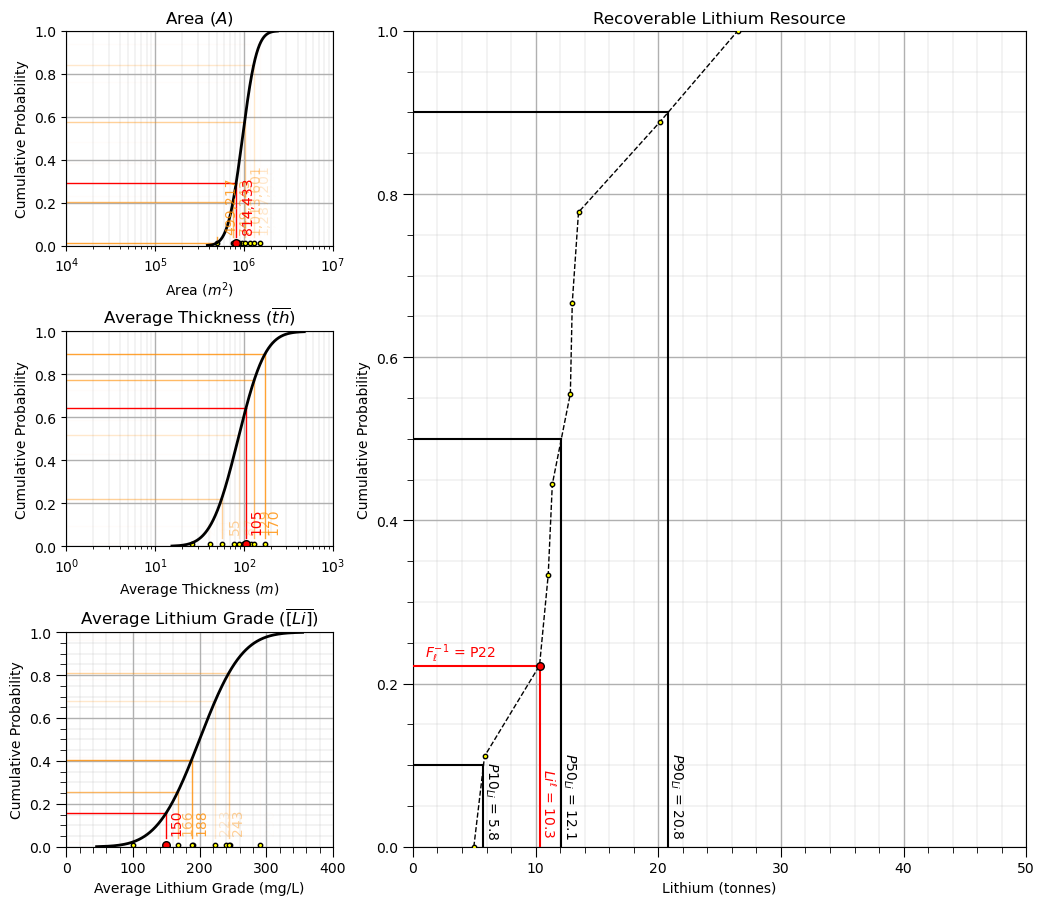

In [113]:
A_mean=1000000; A_stdev=300000
th_mean=100; th_stdev=60
li_mean=200.0;li_stdev=50.0
phi_const = 0.2
sy_const = 0.4
L=10


    
plt_x1 = plt.subplot2grid((3, 3), (0, 0), rowspan=1, colspan=1)
plt_x2 = plt.subplot2grid((3, 3), (1, 0), rowspan=1, colspan=1)
plt_x3 = plt.subplot2grid((3, 3), (2, 0), rowspan=1, colspan=1) 
plt_y = plt.subplot2grid((3, 3), (0, 1), rowspan=3, colspan=2) 

np.random.seed(seed = 73073)

A = plot_input(A_mean,A_stdev,'log',10000,10000000,L,r'Area ($A$)',r'Area ($m^2$)',plt_x1)
th = plot_input(th_mean,th_stdev,'log',1,1000,L,r'Average Thickness ($\overline{th}$)',r'Average Thickness ($m$)',plt_x2)
phi = np.full(L,phi_const)
li = plot_input(li_mean,li_stdev,'norm',0.0,400.0,L,r'Average Lithium Grade ($\overline{[Li]}$)',r'Average Lithium Grade (mg/L)',plt_x3)
sy = np.full(L,sy_const)

resource = (A * th * phi * li * sy) / 1.0e8

last_pvalue = resource.argsort().argsort()[-1]/(L-1)
last = resource[-1] 

plt_y.plot(np.sort(resource),np.linspace(0.0,1.0,L),color='black',lw=1,ls='--',zorder=200)
plt_y.scatter(np.sort(resource),np.linspace(0.0,1.0,L),color='yellow',edgecolor='black',s=10,zorder=201)
plt_y.scatter(last,last_pvalue,color='red',edgecolor='black',s=30,zorder=1000)
add_grid(plt_y); plt_y.set_ylim([0,1]); plt_y.set_xlim(0,50); plt_y.set_ylabel('Cumulative Probability') 
plt_y.set_xlabel('Lithium (tonnes)'); plt_y.set_title('Recoverable Lithium Resource')

plt_y.plot([0,np.percentile(resource,10)],[0.1,0.1],color='black')
plt_y.plot([np.percentile(resource,10),np.percentile(resource,10)],[0.0,0.1],color='black')
plt_y.annotate(r'$P10_{Li}$ = ' + str(np.round(np.percentile(resource,10),1)),xy=[np.percentile(resource,10),0.015],rotation=270,zorder=100)

plt_y.plot([0,np.percentile(resource,50)],[0.5,0.5],color='black')
plt_y.plot([np.percentile(resource,50),np.percentile(resource,50)],[0.0,0.5],color='black')
plt_y.annotate(r'$P50_{Li}$ = ' + str(np.round(np.percentile(resource,50),1)),xy=[np.percentile(resource,50),0.015],rotation=270,zorder=100)

plt_y.plot([0,np.percentile(resource,90)],[0.9,0.9],color='black')
plt_y.plot([np.percentile(resource,90),np.percentile(resource,90)],[0.0,0.9],color='black')
plt_y.annotate(r'$P90_{Li}$ = ' + str(np.round(np.percentile(resource,90),1)),xy=[np.percentile(resource,90),0.015],rotation=270,zorder=100)

plt_y.plot([0,last],[last_pvalue,last_pvalue],color='red',zorder=200)
plt_y.plot([last,last],[0.0,last_pvalue],color='red',zorder=200)
plt_y.annotate(r'$Li^{\ell}$ = ' + str(np.round(last,1)),xy=[last,0.015],color='red',rotation=270,zorder=200)
plt_y.annotate(r'$F_{\ell}^{-1}$ = P' + str(int(last_pvalue*100)),xy=[1,last_pvalue+0.01],color='red',rotation=0,zorder=200)

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.3, hspace=0.4); plt.show()

In [76]:
array = np.array([1,28,14,25,100])

temp = array.argsort().argsort()
temp


array([0, 3, 1, 2, 4], dtype=int64)

In [62]:
array

array([ 1, 28, 14, 25,  9,  3])

Output(outputs=({'output_type': 'stream', 'text': 'test\n', 'name': 'stdout'},))

#### Comments

This was a basic demonstration of Monte Carlo simulation for uncertainty analysis. A lot more could be done, for example, more complicated transfer functions and a combination of non-parametric and parametric distributions. Also, one could integrate relationships between the variables (we assumed independent here).

Note, I have other demonstrations with McMC methods, also!
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)